In [ ]:
#prepare a naive bayes classification model for classification of email messages into spam or not spam

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
df = pd.read_csv("spam.csv", encoding="latin-1")#latin1 encoding is used for assinging a unique numerical value to each charecter which includes many non asky charecters as well

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df=df.rename(columns={
    'v1':'label',
    'v2':'text'
    })
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
x=df['text']
y=df['label']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
distribution=y.value_counts()
print(distribution)

label
ham     4825
spam     747
Name: count, dtype: int64


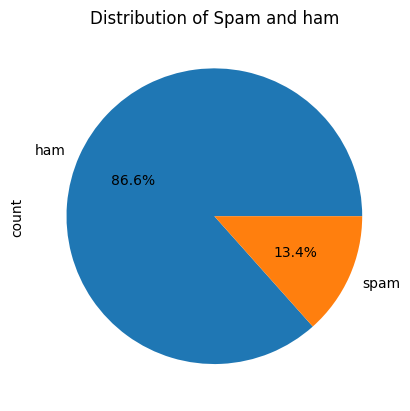

In [19]:
distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Spam and ham')
plt.show()

In [20]:
spam_text=' '.join(df[df['label']=='spam']['text'])
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

In [22]:
text_ham=' '.join(df[df['label']=='ham']['text'])
text_ham

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thatåÕs the way u feel. ThatåÕs the wa

In [25]:
spam_wordcloud=WordCloud(width=800,height=800,max_words=100, background_color='white',random_state=42).generate(spam_text)
#generte is method of wordcloud bclass and is used for generating the word cloud

In [26]:
spam_wordcloud

(-0.5, 799.5, 799.5, -0.5)

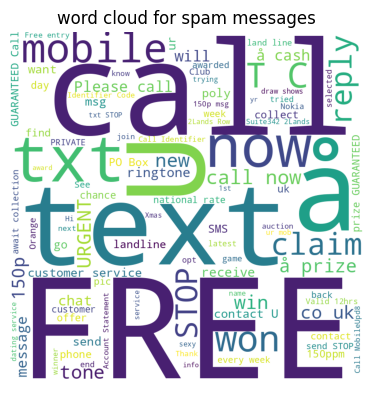

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud)
plt.title("word cloud for spam messages")
plt.axis('off')

In [28]:
ham_wordcloud=WordCloud(width=800,height=800,max_words=100, background_color='white',random_state=42).generate(text_ham)

In [29]:
ham_wordcloud

(-0.5, 799.5, 799.5, -0.5)

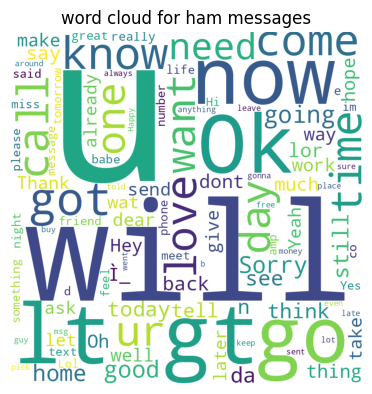

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud)
plt.title("word cloud for ham messages")
plt.axis('off')

In [31]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
#count vectorizer is a class which is used in text proccesing technique for natural language proccesing task and it converts a colection of text documents into numerical representation
#1hotencoding is used for giving an appropiate number to a categorical variable it is only useful when there are a few categories
#if the number of categorical features  are too large then we make use of target variable encoding
#for text classification, count vectorization is used.

In [33]:
model_multinomial = MultinomialNB(alpha=0.8,fit_prior= True,force_alpha= True)
model_multinomial.fit(x_train_vectorized, y_train)#alpha is the regularization parameter which is used to prevent overfitting

MultinomialNB(alpha=0.8)

In [34]:
model_gaussian = GaussianNB()
model_gaussian.fit(x_train_vectorized.toarray(), y_train)

GaussianNB()

In [36]:
y_pred_multinomial = model_multinomial.predict(x_test_vectorized)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Accuracy (Multinomial Naive Bayes):", accuracy_multinomial)
y_pred_gaussian = model_gaussian.predict(x_test_vectorized.toarray())
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Accuracy (Gaussian Naive Bayes):", accuracy_gaussian)

Accuracy (Multinomial Naive Bayes): 0.9838565022421525
Accuracy (Gaussian Naive Bayes): 0.9004484304932735
